# ライフゲーム Conway's Game of Life

仮定
* 各セルは状態“生”と“死”をもつ
* 誕生，生存，死亡のプロセスを経て，“生”と“死”の状態を更新する
* ８近傍のセルの状態により次の状態がきまる
* 遷移ルールは誕生，維持，過疎，過密の４つ
    * 誕生：８近傍中ちょうど３つが“生”ならば次のステップで“生”
    * 維持：８近傍中ちょうど2つが“生”ならば次のステップで更新なし（“生”ならば“生”，“死”ならば“死”）
    * 過疎：８近傍中“生”が１つ以下ならば次のステップで“死”
    * 過密：８近傍中“生”が４つ以上ならば次のステップで“死”

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## 関数の定義

In [2]:
def rule(cells):
    """Conway's Game of Lifeの遷移ルール
    
    入力された3x3の配列に基づき次世代の状態を返す．
    * 誕生：８近傍中ちょうど３つが1ならば次のステップで1
    * 維持：８近傍中ちょうど2つが1ならば次のステップで更新なし（1ならば1，0ならば0）
    * 過疎：８近傍中1が１つ以下ならば次のステップで0
    * 過密：８近傍中1が４つ以上ならば次のステップで0
    
    Args:
        cells: 3x3の配列．中心（cells[1,1]）とその８近傍．
    
    Returns:
        new_cell: 次世代の中心セルの状態．
    
    """
    
    num_neighbors = np.sum(cells)-cells[1,1]
    if num_neighbors == 2:
        new_cell = np.copy(cells[1,1])
    elif num_neighbors == 3:
        new_cell = 1
    else:
        new_cell = 0
    
    return new_cell

In [3]:
def update(field):
    """ライフゲームの更新
    
    `rule()`関数に従い，場の更新をおこなう．周期境界条件を仮定している．
    
    Args:
        field: 現在の場の配列
    Returns:
        new_field: 次世代の場の配列
    """
    n_i, n_j = field.shape
    new_field = np.zeros((n_i, n_j),dtype=field.dtype)
    
    for i in range(n_i):
        for j in range(n_j):
            if i == 0:
                if j == 0:
                    # 境界条件処理 i=0,j=0
                    new_field[i,j] = rule(field[[-1,0,1],:][:,[-1,0,1]])
                elif 0<j<n_j-1:
                    # 境界条件処理 i=0,0<j<n_j-1
                    new_field[i,j] = rule(field[[-1,0,1],:][:,[j-1,j,j+1]])
                elif j == n_j-1:
                    # 境界条件処理 i=0,j=n_j-1
                    new_field[i,j] = rule(field[[-1,0,1],:][:,[n_j-2,n_j-1,0]])
            elif 0 < i < n_i-1:
                if j == 0:
                    # 境界条件処理 1<i<n_i-1,j=0
                    new_field[i,j] = rule(field[[i-1,i,i+1],:][:,[-1,0,1]])
                elif 0 < j< n_j-1:
                    # メイン （1<i<n_i-1,1<j<n_j-1）
                    new_field[i,j] = rule(field[[i-1,i,i+1],:][:,[j-1,j,j+1]])
                elif j == n_j-1:
                    # 境界条件処理 1<i<n_i-1,j=n_j-1
                    new_field[i,j] = rule(field[[i-1,i,i+1],][:,[n_j-2,n_j-1,0]])
            elif i == n_i-1:
                if j == 0:
                    # 境界条件処理 i=n_i,j=0
                    new_field[i,j] = rule(field[[n_i-2,n_i-1,0],][:,[-1,0,1]])
                elif 0<j<n_j-1:
                    # 境界条件処理 i=n_i-1,1<j<n_j-1
                    new_field[i,j] = rule(field[[n_i-2,n_i-1,0],][:,[j-1,j,j+1]])
                elif j == n_j-1:
                    # 境界条件処理 i=n_i-1,j=n_j-1
                    new_field[i,j] = rule(field[[n_i-2,n_i-1,0],][:,[n_j-2,n_j-1,0]])
    
    return new_field

## パタンの例

In [4]:
# グライダー
ptn_glider = np.array([[1,1,1],[1,0,0],[0,1,0]],dtype=int)

# 回転花火
ptn_pinwheel = np.array([
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
], dtype=int)

# グライダー銃
ptn_glidergun = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=int)

# パン屋
ptn_baker = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=int)

## 実行

In [5]:
n_i = 50
n_j = 50
steps = 50

field_list = []
field = np.zeros((n_i,n_j),dtype=int)


field[5:5+ptn_glidergun.shape[0],5:5+ptn_glidergun.shape[1]] = np.copy(ptn_glidergun)
# field=np.random.randint(2,size=field_size,dtype=int)
# print(field)

field_list.append(field)
for t in range(1,steps+1):
    if t%10 == 0:
        print("Steps: ", t)
    # -- 状態遷移 --
    field_tmp = update(field)
    
    # 情報の更新
    field = np.copy(field_tmp)
    field_list.append(field)

Steps:  10
Steps:  20
Steps:  30
Steps:  40
Steps:  50


## 可視化

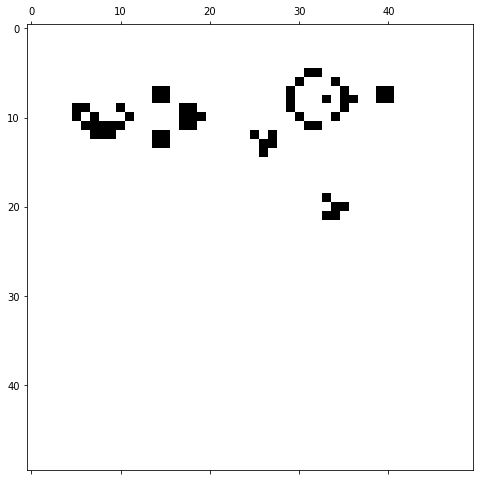

In [6]:
# 9-1-3. セルオートマトンの可視化
plt.figure(figsize=(8,8))
plt.matshow(field_list[50], fignum=1, cmap="binary")

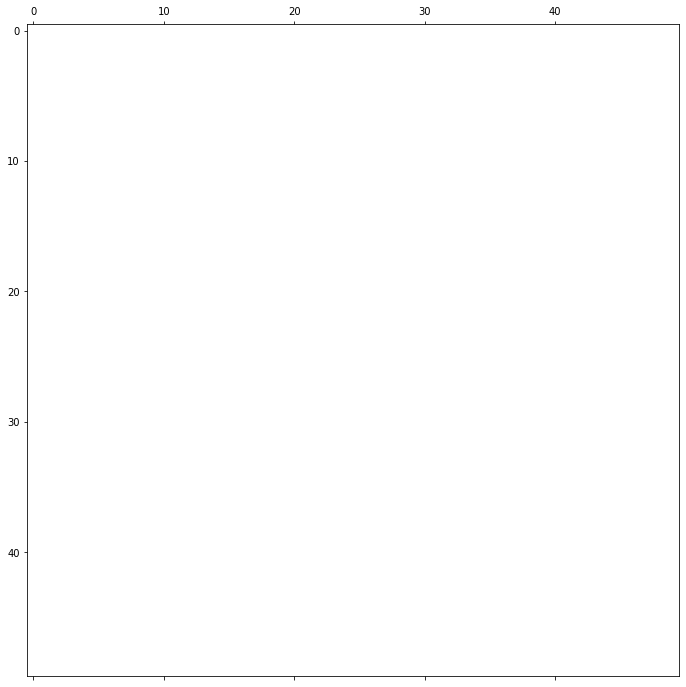

In [7]:
fig, ax = plt.subplots(figsize=(12,12));

artists = []

for i in range(len(field_list)):
    im = ax.matshow(field_list[i], interpolation='none',cmap="binary")

    ax.set_aspect('equal')
    artists.append([im])

ani = animation.ArtistAnimation(fig, artists, interval=100);

In [8]:
HTML(ani.to_jshtml())

In [10]:
# ファイルへの出力
# pillowをインストールする必要あり
ani.save("./glidergun_py.gif", writer="pillow", fps=10)